In [2]:
! pip install git+https://github.com/firekind/athena

  Cloning https://github.com/firekind/athena to /tmp/pip-req-build-86mewb9p
  Running command git clone -q https://github.com/firekind/athena /tmp/pip-req-build-86mewb9p
  Created wheel for athena: filename=athena-0.0.2-cp36-none-any.whl size=48787 sha256=47f50b5b6beacb0fc20fe15876dd44dbffa5c9b7f7ab03da3c72681d61f0353d
  Stored in directory: /tmp/pip-ephem-wheel-cache-4cng8e70/wheels/36/d3/7b/d9500a9af2498abc5d48d60c7db37c1456ee745049da352e0b
Successfully built athena


In [3]:
from torch import optim
import torch.nn.functional as F

from athena import ClassificationSolver, Experiment
from athena.datasets import tinyimagenet, train_val_split
from athena.models import ResNet18

In [4]:
dataset = tinyimagenet("./data", download=True, use_default_transforms=True)
train_loader, val_loader = train_val_split(128, dataset, 0.3)

Extracting ./data/tiny-imagenet-200.zip to ./data



In [10]:
exp = (
    Experiment.builder()
    .props()
        .name("ResNet-18_TinyImageNet")
        .log_directory("./logs")
    .data()
        .train_loader(train_loader)
        .val_loader(val_loader)
    .solver(ClassificationSolver)
        .epochs(50)
        .model(ResNet18(num_classes=200))
        .optimizer(optim.SGD, lr=1e-2, momentum=0.9)
    .build()
)


Running LR Finder:
100/100 [==============================] - 5379s 54s/step


(0.055600000000000004, 0.0001)

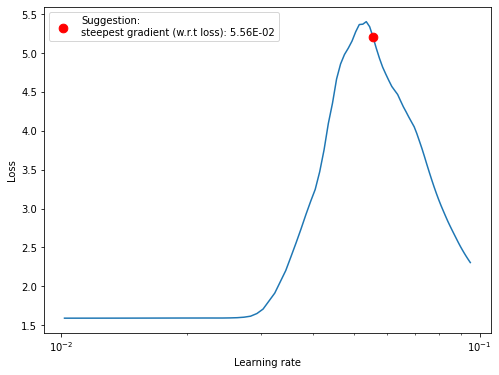

In [6]:
exp.lr_range_test(F.cross_entropy, validate=True, start_lr=1e-4, end_lr=0.1, num_iter=100, step_mode="linear")

In [11]:
exp.fit_one_cycle(max_lr=5.56e-2, max_at_epoch=10, anneal_strategy="linear")

=> Running experiment: ResNet-18_TinyImageNet
Epoch: 1 / 50
547/547 [==============================] - 459s 840ms/step - loss: 4.1600 - train accuracy: 0.0664
Validation set: validation loss: 4.3211, validation accuracy: 0.0922

Epoch: 2 / 50
547/547 [==============================] - 452s 826ms/step - loss: 3.6420 - train accuracy: 0.1484
Validation set: validation loss: 3.8973, validation accuracy: 0.1518

Epoch: 3 / 50
547/547 [==============================] - 451s 825ms/step - loss: 3.3550 - train accuracy: 0.2107
Validation set: validation loss: 3.6878, validation accuracy: 0.1907

Epoch: 4 / 50
547/547 [==============================] - 452s 826ms/step - loss: 2.9900 - train accuracy: 0.2667
Validation set: validation loss: 3.3343, validation accuracy: 0.2488

Epoch: 5 / 50
547/547 [==============================] - 452s 826ms/step - loss: 2.8210 - train accuracy: 0.3162
Validation set: validation loss: 3.2437, validation accuracy: 0.2639

Epoch: 6 / 50
547/547 [================